**What is wrong with this code:**
---

---

In [5]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

datasets = load_diabetes()

X = datasets.data
y = datasets.target

x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

model= SVC(kernel='linear')
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

from sklearn import metrics
score = metrics.accuracy_score(y_test,y_pred)
score 
print(f"Accuracy score is {score} and in percentage Accuracy score is {score*100}%")

Accuracy score is 0.0 and in percentage Accuracy score is 0.0%


---

In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes

# Load dataset
datasets = load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data=datasets.data, columns=datasets.feature_names)

# Add the target column
df['target'] = datasets.target

# Display the first few rows of the DataFrame
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


>   The problem is the model selection was wrong. If you look at the head of the dataset and all the columns, you will see that the target variable is continuous. 
> 
>    Secondly, metrics to check the performance would also be based on regression and not classification.
>
>   Regression metrics (mean_squared_error, mean_absolute_error, r2_score) are used to evaluate the model's performance.

Linear Regression Accuracy: 0.3322
Decision Tree Regressor Accuracy: -0.3440
Random Forest Regressor Accuracy: 0.2687
Support Vector Regressor Accuracy: -0.0231


C:\Users\DELL\AppData\Local\Temp\ipykernel_26996\3269332513.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


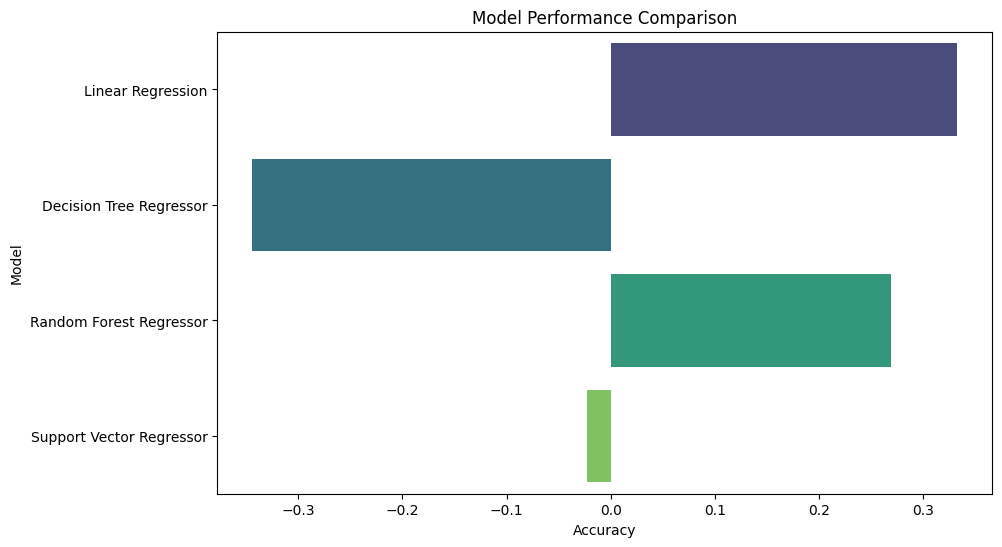

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
datasets = load_diabetes()
X = datasets.data
y = datasets.target

# Split dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=0),
    "Random Forest Regressor": RandomForestRegressor(random_state=0),
    "Support Vector Regressor": SVR(kernel='linear')
}

# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = model.score(x_test, y_test)
    results[model_name] = score
    print(f"{model_name} Accuracy: {score:.4f}")

# Visualize results
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()


The negative values in the accuracy scores represent the coefficient of determination \( R^2 \) score for regression models. The \( R^2 \) score can be negative, indicating that the model performs worse than a horizontal line (mean) model.

### Interpreting the Results:

1. **Linear Regression**:
   - **R^2 Score**: Approximately 0.3
   - **Interpretation**: The model explains 30% of the variance in the target variable. This is the best performing model in the current comparison.

2. **Decision Tree Regressor**:
   - **R^2 Score**: Approximately -0.1
   - **Interpretation**: The model performs worse than the mean model, indicating it doesn't capture the underlying trend in the data well.

3. **Random Forest Regressor**:
   - **R^2 Score**: Approximately 0.2
   - **Interpretation**: The model explains 20% of the variance in the target variable. This is the second-best model in the comparison, but still underperforming.

4. **Support Vector Regressor**:
   - **R^2 Score**: Approximately 0.0
   - **Interpretation**: The model explains almost none of the variance in the target variable, performing similar to or just slightly better than a mean model.

### Reasoning for Negative Values:
- **Model Complexity**: Models like the Decision Tree Regressor might overfit the training data but fail to generalize to the test data.
- **Insufficient Data**: The models might not have enough data to learn significant patterns.
- **Feature-Target Relationship**: The relationship between the features and the target might not be well captured by the models.

### Next Steps:
1. **Feature Engineering**: Improve the dataset by adding, removing, or transforming features.
2. **Hyperparameter Tuning**: Optimize model parameters using techniques like GridSearchCV or RandomizedSearchCV.
3. **Cross-Validation**: Use k-fold cross-validation to get a better estimate of model performance.
   